In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
cd C:\Users\SATHAKI PROSAD\Desktop

C:\Users\SATHAKI PROSAD\Desktop


In [3]:
cr = pd.read_csv('Credit Risk.csv')

In [4]:
cr

,Age,ActiveLoans,Due90Days,RealEstateLoans,CrLineUtilization,Default
0,45,13,0,6,-0.266443,1
1,40,4,0,0,-0.043743,0
2,38,2,1,0,-0.418246,0
3,30,5,0,0,-1.453289,0
4,49,7,0,1,-0.097392,0
...,...,...,...,...,...,...
149995,74,4,0,1,-3.201527,0
149996,44,4,0,1,-1.204973,0
149997,58,18,0,1,-1.402424,0
149998,30,4,0,0,-1.969432,0


In [5]:
cr.isnull()

,Age,ActiveLoans,Due90Days,RealEstateLoans,CrLineUtilization,Default
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
149995,False,False,False,False,False,False
149996,False,False,False,False,False,False
149997,False,False,False,False,False,False
149998,False,False,False,False,False,False


In [6]:
cr.isnull().sum() #checking missing data

Age                  0
ActiveLoans          0
Due90Days            0
RealEstateLoans      0
CrLineUtilization    0
Default              0
dtype: int64

<AxesSubplot:xlabel='Default', ylabel='count'>

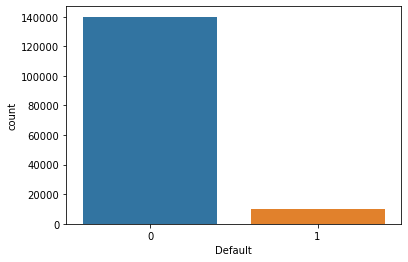

In [7]:
sns.countplot(x=cr["Default"])

<AxesSubplot:xlabel='Due90Days', ylabel='count'>

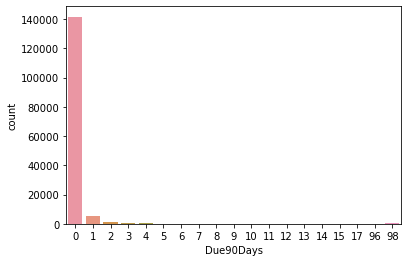

In [8]:
sns.countplot(x=cr["Due90Days"])

<AxesSubplot:xlabel='RealEstateLoans', ylabel='count'>

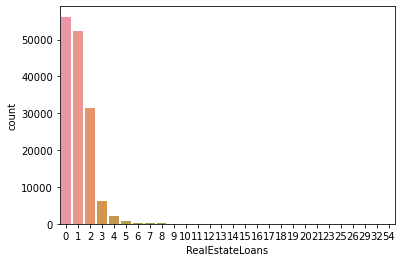

In [9]:
sns.countplot(x=cr["RealEstateLoans"])

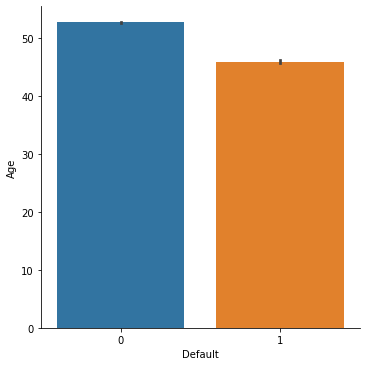

In [10]:
sns.catplot(data=cr, x="Default", y="Age", kind="bar") #people having age above 45 years have less chance of being default

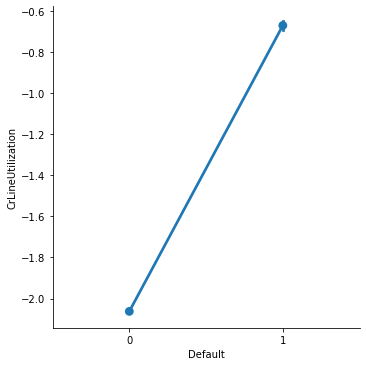

In [11]:
sns.catplot(data=cr, x="Default", y="CrLineUtilization", kind="point") # less crlineutilization more chance of being default

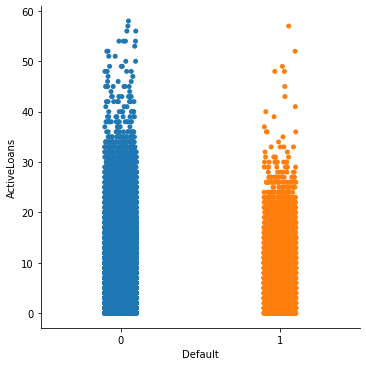

In [12]:
sns.catplot(data=cr, x="Default", y="ActiveLoans", kind="strip")# people having active loans have less chance of being default

In [ ]:
sns.catplot(data=cr, x="Default", y="Due90Days", kind="swarm")

In [ ]:
sns.catplot(data=cr, x="Default", y="RealEstateLoans", kind="bar")

In [ ]:
sns.pairplot(cr,hue="Default",palette="Dark2")

<AxesSubplot:title={'center':'ActiveLoans and Default'}, xlabel='RealEstateLoans', ylabel='ActiveLoans'>

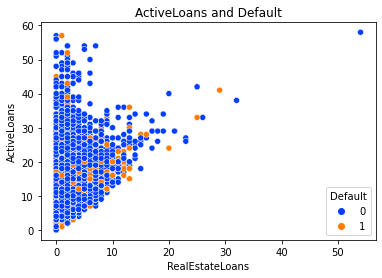

In [5]:
plt.title("ActiveLoans and Default")
sns.scatterplot(x="RealEstateLoans",y="ActiveLoans",data=cr,hue="Default",palette="bright")

In [6]:
cr.describe()

,Age,ActiveLoans,Due90Days,RealEstateLoans,CrLineUtilization,Default
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,52.295207,8.452760,0.265973,1.018240,-1.969432,0.066840
std,14.771866,5.145951,4.169304,1.129771,1.705615,0.249746
min,0.000000,0.000000,0.000000,0.000000,-9.210340,0.000000
25%,41.000000,5.000000,0.000000,0.000000,-2.979859,0.000000
50%,52.000000,8.000000,0.000000,1.000000,-1.869505,0.000000
75%,63.000000,11.000000,0.000000,2.000000,-0.581561,0.000000
max,109.000000,58.000000,98.000000,54.000000,10.833839,1.000000


In [ ]:
#mean is almost same as median in almost all variables so the date is  not skewed
#although SD is not that high but there is a small gap between Q3 and Q1
#lets check the outliers through box plot
#Lets check the data distribution through dist plot


<AxesSubplot:xlabel='ActiveLoans', ylabel='Density'>

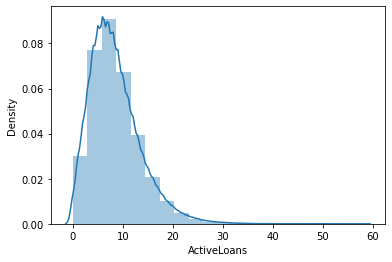

In [7]:
sns.distplot(cr["ActiveLoans"],bins=20) 

<AxesSubplot:xlabel='Due90Days', ylabel='Density'>

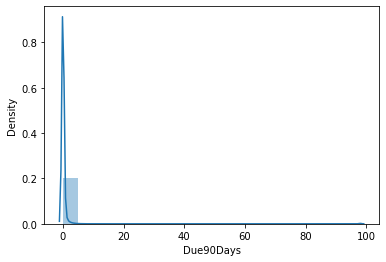

In [8]:
sns.distplot(cr["Due90Days"],bins=20)

<AxesSubplot:xlabel='RealEstateLoans', ylabel='Density'>

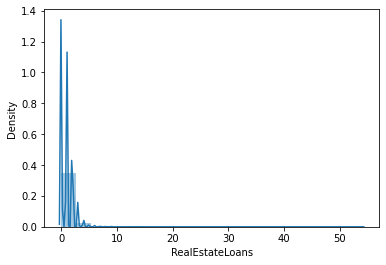

In [9]:
sns.distplot(cr["RealEstateLoans"],bins=20)

In [10]:
cr.skew()# 

Age                   0.188995
ActiveLoans           1.215314
Due90Days            23.087345
RealEstateLoans       3.482484
CrLineUtilization    -0.586512
Default               3.468857
dtype: float64

In [11]:
#removing skewness
cr["ActiveLoans"]=np.cbrt(cr["ActiveLoans"])

<AxesSubplot:xlabel='ActiveLoans', ylabel='Density'>

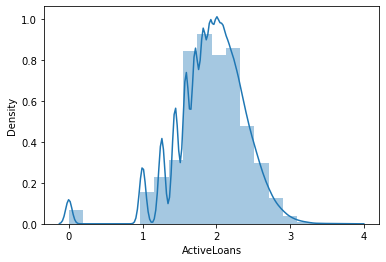

In [12]:
sns.distplot(cr["ActiveLoans"],bins=20) 

In [13]:
cr["Due90Days"]=np.cbrt(cr["Due90Days"])

<AxesSubplot:xlabel='Due90Days', ylabel='Density'>

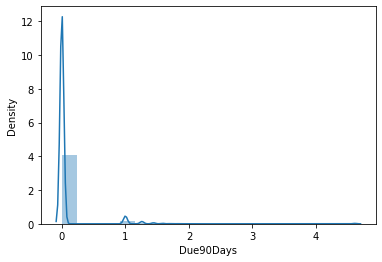

In [14]:
sns.distplot(cr["Due90Days"],bins=20) 

In [15]:
cr["RealEstateLoans"]=np.cbrt(cr["RealEstateLoans"])

<AxesSubplot:>

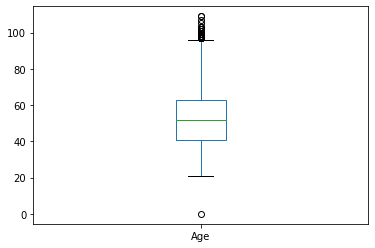

In [16]:
#checking outliers through box plot
cr["Age"].plot.box()# 

<AxesSubplot:>

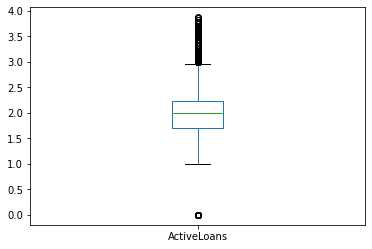

In [17]:
cr["ActiveLoans"].plot.box()

<AxesSubplot:>

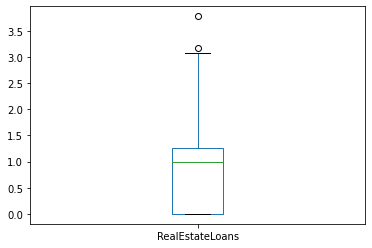

In [18]:
cr["RealEstateLoans"].plot.box()

<AxesSubplot:>

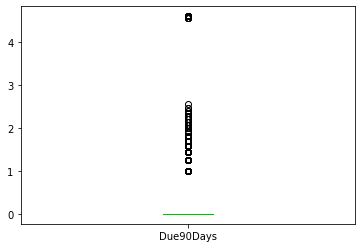

In [19]:
cr["Due90Days"].plot.box()

<AxesSubplot:>

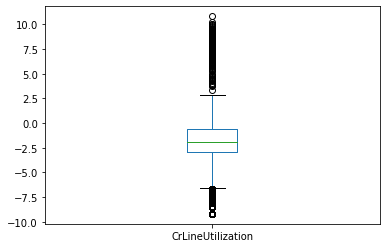

In [20]:
cr["CrLineUtilization"].plot.box()

In [21]:
minthershold,maxthershold=cr.Age.quantile([0.001,0.999])
minthershold,maxthershold

(21.0, 94.0)

In [22]:
cr[cr.Age<minthershold]

,Age,ActiveLoans,Due90Days,RealEstateLoans,CrLineUtilization,Default
65695,0,1.817121,0.0,1.259921,0.0,0


In [23]:
cr[cr.Age>maxthershold]

,Age,ActiveLoans,Due90Days,RealEstateLoans,CrLineUtilization,Default
436,97,1.259921,0.0,0.0,-4.961845,0
2864,96,1.442250,0.0,0.0,-4.474142,0
2922,99,1.709976,0.0,0.0,-5.298317,0
4627,95,1.442250,0.0,1.0,0.000000,0
6833,95,1.442250,0.0,0.0,-4.677741,0
...,...,...,...,...,...,...
143221,96,1.259921,0.0,1.0,-2.821779,0
144319,95,1.912931,0.0,0.0,-3.839702,0
146042,95,1.259921,0.0,0.0,-4.595220,0
147651,97,2.000000,0.0,1.0,-4.491842,0


In [24]:
CR=cr[(cr.Age<maxthershold)&(cr.Age>minthershold)]

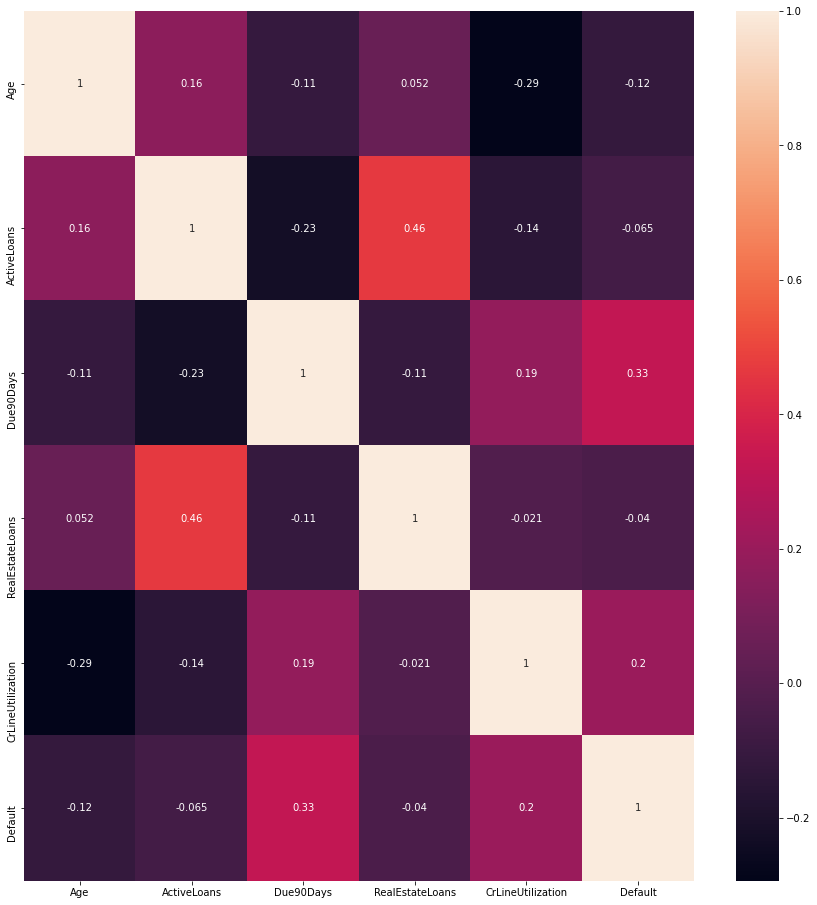

In [25]:
corr_hmap=cr.corr()
plt.figure(figsize=(15,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [26]:
x = cr.drop('Default', axis=1).copy()

In [27]:
# no multicollinearity found, checking multicollinearity by variance inflation factor
#Here except crlineutilization and duein90days every other factors are negatively correlated
#But active loans and real estate loans must be postively correlated with default, lets validate with logistic regression

In [28]:
x

,Age,ActiveLoans,Due90Days,RealEstateLoans,CrLineUtilization
0,45,2.351335,0.0,1.817121,-0.266443
1,40,1.587401,0.0,0.000000,-0.043743
2,38,1.259921,1.0,0.000000,-0.418246
3,30,1.709976,0.0,0.000000,-1.453289
4,49,1.912931,0.0,1.000000,-0.097392
...,...,...,...,...,...
149995,74,1.587401,0.0,1.000000,-3.201527
149996,44,1.587401,0.0,1.000000,-1.204973
149997,58,2.620741,0.0,1.000000,-1.402424
149998,30,1.587401,0.0,0.000000,-1.969432


In [29]:
y = cr['Default'].copy()
y

0         1
1         0
2         0
3         0
4         0
         ..
149995    0
149996    0
149997    0
149998    0
149999    0
Name: Default, Length: 150000, dtype: int64

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [31]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

In [32]:
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [34]:
x_train.shape

(120000, 5)

In [35]:
y_train.shape

(120000,)

In [36]:
x_test.shape

(30000, 5)

In [37]:
y_test.shape

(30000,)

In [38]:
lg=LogisticRegression()

In [39]:
lg.fit(x_train,y_train)

LogisticRegression()

In [40]:
lg.coef_

array([[-0.01916378,  0.45247538,  1.67377882, -0.05743141,  0.50919535]])

In [41]:
lg.intercept_

array([-2.1072014])

In [42]:
pred=lg.predict(x_test)

In [43]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
accuracy_score(y_test,pred)
#accuracy is the no of correct predictions/total no of predictions

0.9343333333333333

In [45]:
print(confusion_matrix(y_test,pred))
#it shows type 1 and type 2 error

[[27857   187]
 [ 1783   173]]


In [46]:
print(classification_report(y_test,pred))
#The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision), shows what % of positive predictions are correct
#precision says hat % of predictions are correct
#Precision = TP/(TP + FP), it is accuracy of positive predictions
#Recall is the fraction of positive that are correctly identified
#Recall = TP/(TP+FN)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     28044
           1       0.48      0.09      0.15      1956

    accuracy                           0.93     30000
   macro avg       0.71      0.54      0.56     30000
weighted avg       0.91      0.93      0.91     30000



<AxesSubplot:>

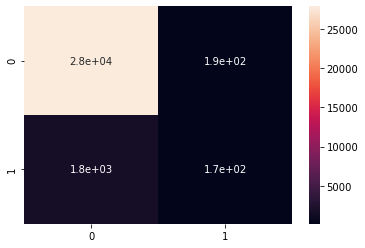

In [47]:
p=confusion_matrix(y_test,pred)
sns.heatmap(p,annot=True)

In [48]:
lg.coef_

array([[-0.01916378,  0.45247538,  1.67377882, -0.05743141,  0.50919535]])

In [49]:
lg.intercept_

array([-2.1072014])

In [50]:
lg.score(x_train,y_train)

0.9343

In [51]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [52]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [53]:
y_pred_prob

array([0.01503753, 0.03493833, 0.0186792 , ..., 0.09976691, 0.01072999,
       0.03013184])

In [54]:
fpr,tpr,thersholds=roc_curve(y_test,y_pred_prob)

In [55]:
fpr
#FPR=FP/FP+TN

array([0.00000000e+00, 3.56582513e-05, 3.56582513e-05, ...,
       9.96148909e-01, 9.96220225e-01, 1.00000000e+00])

In [56]:
tpr
#TPR=TP/TP+FN, FN is False negative and TP is true Positive

array([0.00000000e+00, 0.00000000e+00, 5.11247444e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [57]:
thersholds

array([1.99546503e+00, 9.95465033e-01, 9.94615963e-01, ...,
       1.52611771e-03, 1.52605693e-03, 4.16036798e-04])

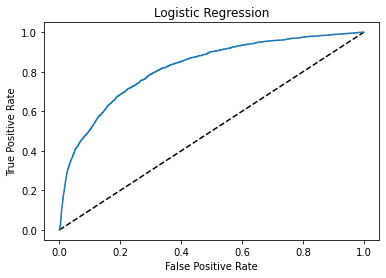

In [58]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

In [59]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [60]:
auc_score

0.5408888573871209

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
st=StandardScaler()
x=st.fit_transform(x)
x
#Standard scalling is done to make the datapoints generalised so the distance between them is lower

array([[-4.93859818e-01,  8.91842908e-01, -2.13873914e-01,
         1.92166045e+00,  9.98464430e-01],
       [-8.32342222e-01, -7.62466477e-01, -2.13873914e-01,
        -1.24815489e+00,  1.12903343e+00],
       [-9.67735183e-01, -1.47162918e+00,  2.85773440e+00,
        -1.24815489e+00,  9.09461682e-01],
       ...,
       [ 3.86194432e-01,  1.47524704e+00, -2.13873914e-01,
         4.96261717e-01,  3.32437638e-01],
       [-1.50930703e+00, -7.62466477e-01, -2.13873914e-01,
        -1.24815489e+00, -4.30306835e-11],
       [ 7.92373317e-01,  1.31022538e-01, -2.13873914e-01,
         9.49672314e-01,  1.05960185e+00]])

In [63]:
X=pd.DataFrame(data=x)
X

,0,1,2,3,4
0,-0.493860,0.891843,-0.213874,1.921660,9.984644e-01
1,-0.832342,-0.762466,-0.213874,-1.248155,1.129033e+00
2,-0.967735,-1.471629,2.857734,-1.248155,9.094617e-01
3,-1.509307,-0.497029,-0.213874,-1.248155,3.026152e-01
4,-0.223074,-0.057526,-0.213874,0.496262,1.097579e+00
...,...,...,...,...,...
149995,1.469338,-0.762466,-0.213874,0.496262,-7.223783e-01
149996,-0.561556,-0.762466,-0.213874,0.496262,4.482030e-01
149997,0.386194,1.475247,-0.213874,0.496262,3.324376e-01
149998,-1.509307,-0.762466,-0.213874,-1.248155,-4.303068e-11


In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [65]:
lg=LogisticRegression()

In [66]:
lg.fit(x_train,y_train)

LogisticRegression()

In [67]:
lg.score(x_train,y_train)

0.9343

In [68]:
y_pred_prob=lg.predict_proba(X_test)[:,1]

In [69]:
auc_score=roc_auc_score(y_test,lg.predict(X_test))

In [70]:
auc_score

0.6541701996774569

In [71]:
lg.coef_

array([[-0.01916378,  0.45247538,  1.67377882, -0.05743141,  0.50919535]])

In [72]:
lg.intercept_

array([-2.1072014])

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
st=MinMaxScaler()
x=st.fit_transform(x)
x

array([[0.41284404, 0.60744242, 0.        , 0.48074986, 0.44620923],
       [0.36697248, 0.41008826, 0.        , 0.        , 0.45731967],
       [0.34862385, 0.32548726, 0.21689921, 0.        , 0.43863576],
       ...,
       [0.53211009, 0.67704079, 0.        , 0.26456684, 0.38953536],
       [0.27522936, 0.41008826, 0.        , 0.        , 0.36124742],
       [0.58715596, 0.51667883, 0.        , 0.33333333, 0.45141156]])

In [75]:
xx=pd.DataFrame(data=x)
xx

,0,1,2,3,4
0,0.412844,0.607442,0.000000,0.480750,0.446209
1,0.366972,0.410088,0.000000,0.000000,0.457320
2,0.348624,0.325487,0.216899,0.000000,0.438636
3,0.275229,0.441754,0.000000,0.000000,0.386998
4,0.449541,0.494186,0.000000,0.264567,0.454643
...,...,...,...,...,...
149995,0.678899,0.410088,0.000000,0.264567,0.299778
149996,0.403670,0.410088,0.000000,0.264567,0.399386
149997,0.532110,0.677041,0.000000,0.264567,0.389535
149998,0.275229,0.410088,0.000000,0.000000,0.361247


In [76]:
xx_train,xx_test,y_train,y_test=train_test_split(xx,y,test_size=0.20,random_state=42)

In [77]:
lg=LogisticRegression()

In [78]:
lg.fit(xx_train,y_train)

LogisticRegression()

In [79]:
lg.score(xx_train,y_train)

0.9343

In [80]:
y_pred_prob=lg.predict_proba(xx_test)[:,1]

In [81]:
auc_score=roc_auc_score(y_test,lg.predict(X_test))

In [82]:
auc_score

0.7482331664614676

In [83]:
lg.coef_

array([[-2.09067784,  1.67231776,  7.64509794, -0.21183638,  9.79810062]])

In [84]:
lg.intercept_

array([-6.58613017])

In [85]:
#Minmax scalling model is giving best result As accuracy score is 0.93 and auc score is 0.73, so business
#firm should use this model to predict the defaulter
# Due90days and crutilization are the most important factors because these are highly positive coefficient compared 
#to other factors hence it these increases then chance of being defaulter also increases
#Activeloans and realestate loans are also have positive coeficient hence if these increases chance of being defaulter
#increases
#Age is negatvely coorelated hence aged person are most likely to become non defaulter  because they have savings as well as 
#high income